In [ ]:
#Exercise 1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

NameError: ignored

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Preprocessing

In [ ]:
#Scaling pixel values from range ot 0-255 to range 0-1

train_images = train_images / 255.0
test_images = test_images / 255.0

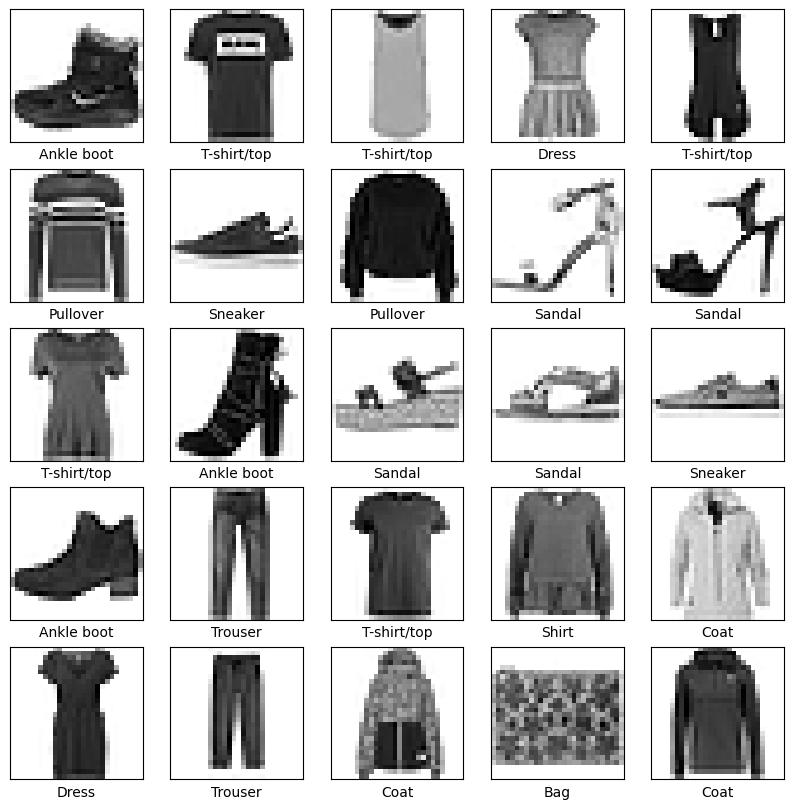

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Model Creation

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5003 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3723 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3367 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3121 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2933 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2799 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2686 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2591 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2482 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

Evaluating accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest Accuracy :",test_acc*100,"%")

313/313 - 1s - loss: 0.3308 - accuracy: 0.8834 - 515ms/epoch - 2ms/step

Test Accuracy : 88.3400022983551 %


Make predictions

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

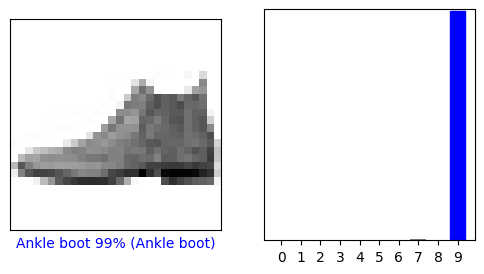

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

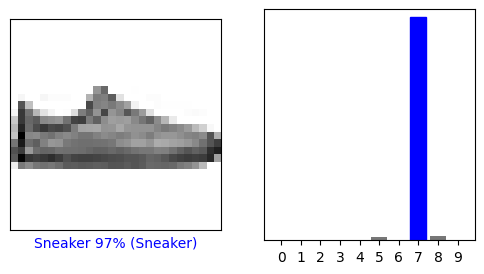

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

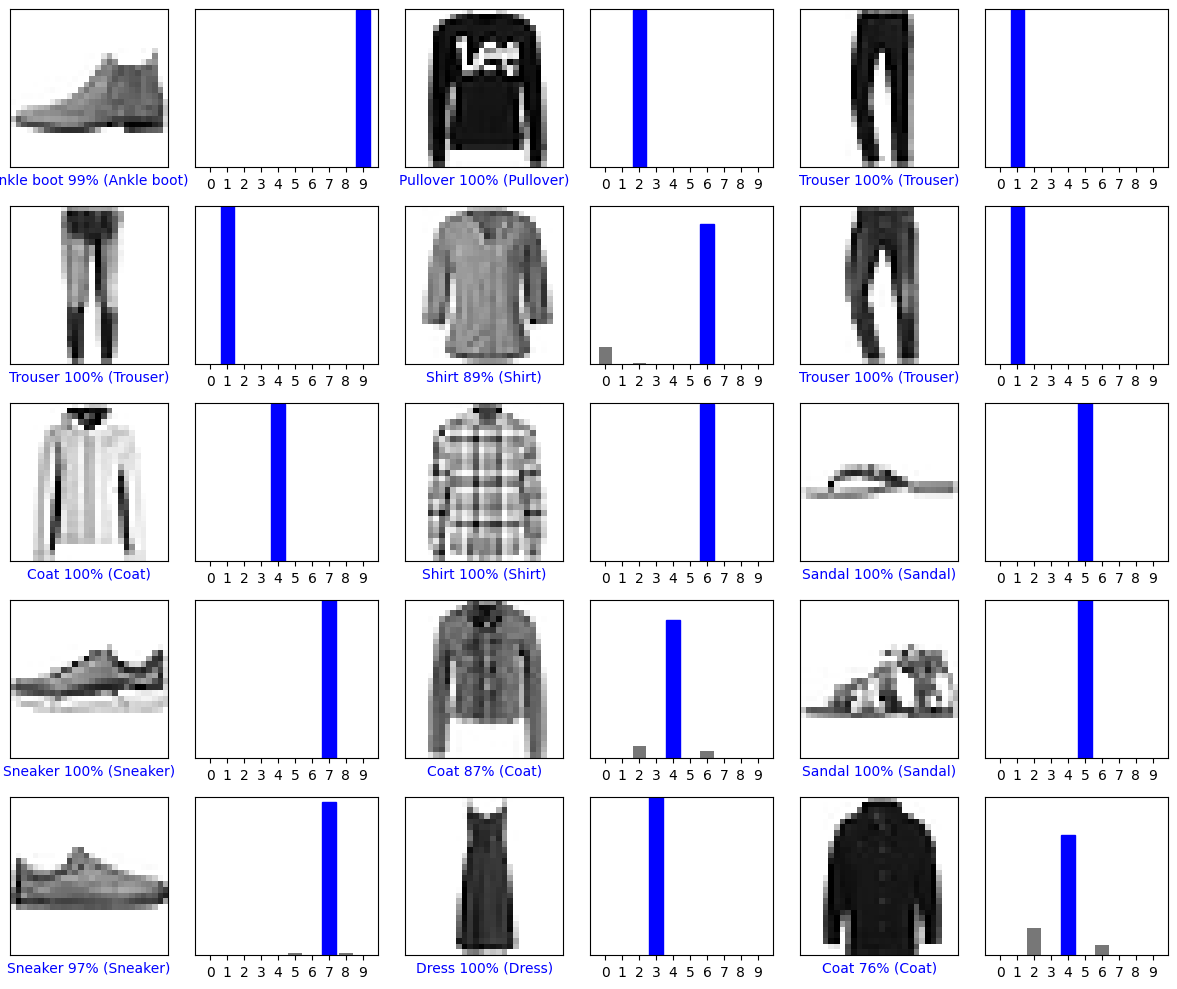

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Using the trained model

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[6.5007785e-06 4.8462740e-12 9.9620360e-01 1.1501847e-08 1.8469135e-03
  9.4233879e-14 1.9429241e-03 2.3333242e-14 5.2733590e-12 7.5402526e-15]]


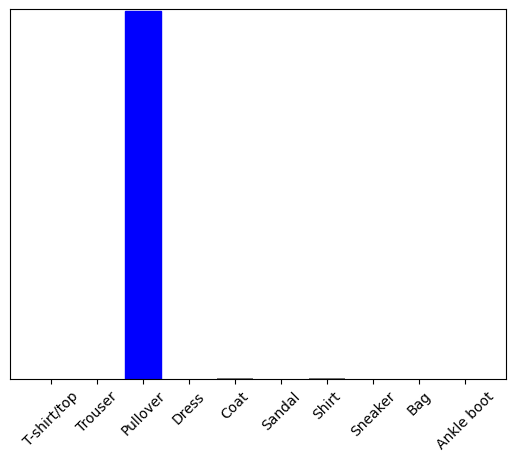

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2

## Exercise 1

In [ ]:
#Load dataset and normalize pixel values
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Create and compile model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [ ]:
predictions = model(x_train[:1]).numpy
predictions

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[  27.51067 , -121.69681 ,  -61.237762,  -10.782005,  133.72809 ,
         106.96018 ,  163.4667  ,   38.06417 ,   50.353416,  -51.477184]],
      dtype=float32)>>

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
#Feed the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.5039 - accuracy: 0.7525
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6170 - accuracy: 0.8370
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4881 - accuracy: 0.8695
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4281 - accuracy: 0.8867
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3993 - accuracy: 0.8947


In [ ]:
#Evaluate accuracy
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.2791 - accuracy: 0.9251 - 1s/epoch - 4ms/step


[0.2791280448436737, 0.9251000285148621]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.09028230e-31, 0.00000000e+00, 6.85724264e-13, 3.24336239e-12,
        3.11155283e-27, 4.02365929e-17, 4.76966681e-27, 1.00000000e+00,
        2.26036393e-36, 2.71122657e-17],
       [0.00000000e+00, 2.97825597e-03, 9.97021616e-01, 1.35534336e-07,
        9.76844687e-27, 1.04249339e-29, 1.03470184e-11, 8.60136813e-21,
        1.57611962e-11, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 9.66700661e-15, 0.00000000e+00,
        3.25820425e-13, 1.46134038e-12, 4.15150761e-11, 1.14864984e-09,
        3.35600775e-12, 3.70047051e-38],
       [9.99992728e-01, 1.06207262e-24, 9.59225986e-07, 2.35944510e-13,
        5.55230081e-12, 1.20628962e-09, 3.46695983e-09, 6.24907170e-06,
        7.67132191e-12, 9.22650614e-08],
       [1.37713781e-11, 1.21925026e-19, 3.60684886e-08, 5.51040058e-09,
        9.97412980e-01, 2.02754838e-03, 3.23775050e-04, 8.50359284e-05,
        1.07461496e-07, 1.50483247e-04]], dtype=float32)>